<a href="https://colab.research.google.com/github/RohitAnand1996/DataScienceBasics/blob/main/Scaling_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scaling Features

**There are two types of feature scaling:**
  - Normalization 
      range [0,1] or [-1,1]
  - Standadardization
      mean = 0 ; Standard deviation = 1

**Reason for standardization**
  - Feature importance; models gives equal importance to all the feature
  - For faster convergence of the gradient descent
**Algorithms where scaling matters:**
  - KNN
  - K-Means 
  - PCA
<br>*Distanced based approaches in general requires scaling*

**Algorithms where it does not require scaling:**
  - Decision Tress
  - Random forest
<br>*Algorithms which reles on rules do not require scaling*
**Few Algorithms can handle the scaling part on its own:**
  - Linear Discrimant Analysis(LDA)
  - Naive Bayes

**Types of Scaling**
  - Min-Max Scaler(Normalization techinique)
  - Standard Scaler
  - Max Abs Scaler
  - Robust Scaler
  - Quantile Scaler
  - Power Transformer Scaler
  - Unit Vector Scaler

### Understanding each of scaler in detail

#### Min Max Scaler

**Formula:**<br>
         Xsc= X−Xmin / Xmax−Xmin
  
**Key features:**<br>
  - Works well when distribution is not normal
  - small standard deviation 
  - Sensitive to Outliers
  - range [0,1]<br>
*Note: check the boundaries and outliers before you apply this technique*

In [18]:
# lets get some data 
import pandas as pd
import numpy as np
data = {'product_name': ['laptop', 'printer', 'tablet1', 'tablet2', 'tablet3', 'tablet4', 'desk1', 'desk2', 'desk3', 'desk4', 'chair1','chair2', 'chair3', 'chair4'],
        'price': [1200, 150, 300, 340, 370, 290, 450, 430, 420, 390, 200, 250, 220, 290]
        }
df = pd.DataFrame(data) 
df.head()

,product_name,price
0,laptop,1200
1,printer,150
2,tablet1,300
3,tablet2,340
4,tablet3,370


In [19]:
# lets scale the price column
Xmin = df.price.min()
Xmax = df.price.max()
df['scaled_price'] = df.price.apply(lambda x : (x-Xmin)/(Xmax - Xmin))
df.head()

,product_name,price,scaled_price
0,laptop,1200,1.000000
1,printer,150,0.000000
2,tablet1,300,0.142857
3,tablet2,340,0.180952
4,tablet3,370,0.209524


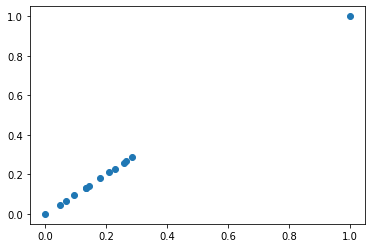

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df.scaled_price,df.scaled_price )
plt.show()

In [22]:
# lets remove the outliler and scale it again and see the difference 
df_outlier_removed = df.copy()[df.product_name != 'laptop']
Xmin = df_outlier_removed.price.min()
Xmax = df_outlier_removed.price.max()
df_outlier_removed['scaled_price_outlier_removed'] = df_outlier_removed.price.apply(lambda x : (x-Xmin)/(Xmax - Xmin))
df_outlier_removed.head()

,product_name,price,scaled_price,scaled_price_outlier_removed
1,printer,150,0.000000,0.000000
2,tablet1,300,0.142857,0.500000
3,tablet2,340,0.180952,0.633333
4,tablet3,370,0.209524,0.733333
5,tablet4,290,0.133333,0.466667


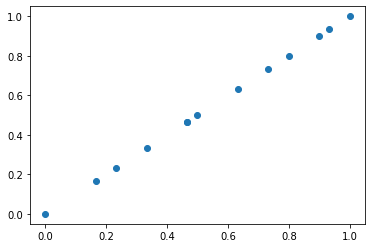

In [24]:
plt.scatter(df_outlier_removed.scaled_price_outlier_removed,df_outlier_removed.scaled_price_outlier_removed )
plt.show()

Notice the difference between the two plots and scaled values?
Example? 300 with outlier was scaled to 0.14 and 340 was scaled to 0.18 whereas without outliers 300 is 0.50 and 340 is .63. Yes, the spread of data increase and it is very cruicial for algorithm to differentiate between the two values

In [41]:
# easy way to do it using Sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
array = df_outlier_removed.price
# scaler fit transform takes only 2D array, need to reshape but before that need convert series to array
array = np.array(array).reshape(-1,1)
array = scaler.fit_transform(array)
df_outlier_removed['scaled_using_sklearn'] = array
df_outlier_removed.head()

,product_name,price,scaled_price,scaled_price_outlier_removed,scaled_using_sklearn
1,printer,150,0.000000,0.000000,0.000000
2,tablet1,300,0.142857,0.500000,0.500000
3,tablet2,340,0.180952,0.633333,0.633333
4,tablet3,370,0.209524,0.733333,0.733333
5,tablet4,290,0.133333,0.466667,0.466667


#### Standard Scaler (Standardization)

**Formula:**<br>
    Xsc = X - Xmean / Xsd

**Key features:**
  - **Generally**, used when data is Normally Distributed
  - the values are not restricted to a particular range
  - Not Sensitive to Outliers
  

In [53]:
# lets use the same data to see the difference 
data = {'product_name': ['laptop', 'printer', 'tablet1', 'tablet2', 'tablet3', 'tablet4', 'desk1', 'desk2', 'desk3', 'desk4', 'chair1','chair2', 'chair3', 'chair4'],
        'price': [1200, 150, 300, 340, 370, 290, 450, 430, 420, 390, 200, 250, 220, 290]
        }
df = pd.DataFrame(data) 
df.head()

,product_name,price
0,laptop,1200
1,printer,150
2,tablet1,300
3,tablet2,340
4,tablet3,370


In [54]:
# lets scale the price column
Xmean = df.price.mean()
Xsd = np.std(df.price)
df['scaled_price'] = df.price.apply(lambda x : (x-Xmean)/Xsd)
df.head()

,product_name,price,scaled_price
0,laptop,1200,3.366374
1,printer,150,-0.936730
2,tablet1,300,-0.322001
3,tablet2,340,-0.158073
4,tablet3,370,-0.035127


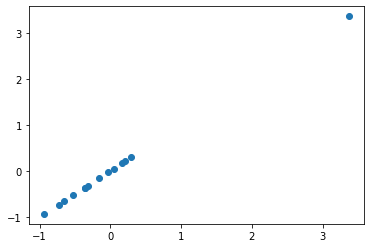

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df.scaled_price,df.scaled_price )
plt.show()

In [60]:
#checking mean 
print(df.scaled_price.mean())

6.740639792367021e-17
